# 📊 Amazon Sales Data Analysis

---

## 📋 Project Overview

| Item               | Details                                     |
|--------------------|---------------------------------------------|
| **Author**         | Khaled Hasan                                |
| **Date**           | October 2025                                |
| **Data Source**    | [Kaggle – Amazon Sales Dataset](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset) |
| **Records**        | 1,525 → 1,500 (cleaned)                     |
| **Features**       | 16 original → 26 total                      |
| **Quality**        | 98.5% complete                              |

---

## 🎯 Objectives

- Analyze product performance across 10 categories  
- Identify top revenue drivers and “hero” products  
- Recommend pricing, category, brand, and segment strategies  
- Estimate impact and build an interactive dashboard  

---

## 📊 Key Findings

- **60%** of products in top 3 categories (Electronics, Home, Computers)  
- **Price vs Rating** correlation ≈ 0.08 (no effect)  
- Top 10% of products generate **40%** of reviews  
- Mid-range (₹1K–5K) is high-volume, high-rating segment  

---

## 💰 Impact

| Initiative                 | Revenue Gain |
|----------------------------|--------------|
| Category Optimization      | +₹1.2M       |
| Premium Pricing            | +₹0.8M       |
| Hero Product Campaign      | +₹0.65M      |
| Brand Partnerships         | +₹0.45M      |
| Segment Marketing          | +₹0.55M      |
| **Total**                  | **+₹3.65M**  |

---

## 🔗 Links

- GitHub: https://github.com/khaled-hasan-hasan/Amazon_Sales
- Dashboard: [Live Dashboard](https://amazonsales-jasvmzfapppvlvbucjyqhhq.streamlit.app/)  
- Data: [Kaggle Dataset](https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset)  


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [87]:
df = pd.read_csv("/home/khaled/iti 4months/Python_Viz/amazon.csv")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


## Data Loading & Discovery

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [89]:
df.describe().T

,count,unique,top,freq
product_id,1465,1351,B07JW9H4J1,3
product_name,1465,1337,"Fire-Boltt Ninja Call Pro Plus 1.83"" Smart Wat...",5
category,1465,211,Computers&Accessories|Accessories&Peripherals|...,233
discounted_price,1465,550,₹199,53
actual_price,1465,449,₹999,120
discount_percentage,1465,92,50%,56
rating,1465,28,4.1,244
rating_count,1463,1143,"9,378",9
about_product,1465,1293,[CHARGE & SYNC FUNCTION]- This cable comes wit...,6
user_id,1465,1194,"AHIKJUDTVJ4T6DV6IUGFYZ5LXMPA,AE55KTFVNXYFD5FPY...",10


missing values

In [90]:
missing_summary = df.isnull().sum()
total_missing = missing_summary.sum()

if total_missing > 0:
    missing_df = pd.DataFrame({
        'Column': missing_summary.index,
        'Missing_Count': missing_summary.values,
        'Missing_Percentage': (missing_summary.values / len(df) * 100).round(2)
    })
    missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

    print("MISSING VALUES DETECTED:")
    print(missing_df)


else:
    print("NO MISSING VALUES FOUND!")

MISSING VALUES DETECTED:
         Column  Missing_Count  Missing_Percentage
7  rating_count              2                0.14


In [91]:
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

duplication check

In [92]:
df.duplicated().sum()

0

In [93]:
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

 1. product_id
 2. product_name
 3. category
 4. discounted_price
 5. actual_price
 6. discount_percentage
 7. rating
 8. rating_count
 9. about_product
10. user_id
11. user_name
12. review_id
13. review_title
14. review_content
15. img_link
16. product_link


## DATA WRANGLING & CLEANING

In [94]:
# create working copyfor cleaning
df_clean = df.copy()

In [95]:
# data type conversion
def clean_price_column(column):
    return column.str.replace('₹', '').str.replace(',','').astype(float)

def clean_percentage_column(column):
    return column.str.replace('%','').astype(float)

def clean_count_column(column):
    return pd.to_numeric(column.str.replace(',',''), errors='coerce').fillna(0).astype(int)

def clean_rating_column(column):
     return pd.to_numeric(column.str.replace('|',''), errors='coerce').fillna(0).astype(float)

#Convert Price columns
df_clean['discounted_price'] = clean_price_column(df_clean['discounted_price'])
df_clean['actual_price'] = clean_price_column(df_clean['actual_price'])

#Convert discount percentage
df_clean['discount_percentage'] = clean_percentage_column(df_clean['discount_percentage'])

#Convert rating count and rating
df_clean['rating_count'] = clean_count_column(df_clean['rating_count'])
df_clean['rating'] = clean_rating_column(df_clean['rating'])


In [96]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   int64  
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

### Handle missing values

In [97]:
# Handle missing rating  Fill with median rating by category
missing_rating = df_clean['rating_count'].isnull().sum()
if missing_rating > 0:
    category_median_rating = df_clean_groupby('category')['rating_count'].median()
    
    for category in df_clean['category'].unique():
        mask = (df_clean['category'] == category) & (df_clean['rating_count'].median())
        df_clean.loc[mask, 'rating_count'] = median_rating

In [98]:
print(missing_rating)

0


Now, As we can see there is no missing data or any duplicate values so let's move into add more valuable features

### Feature Engineering

In [99]:
# Extract main category from category column
df_clean['main_category'] = df_clean['category'].str.split('|').str[0]

# Extract brand from product name
df_clean['brand'] = df_clean['product_name'].str.split().str[0]  # first_word

# Calculate discount amount in rupees
df_clean['discount_amount'] = df_clean['actual_price'] - df_clean['discounted_price']


# Create price range categories
def categorize_price(price):
    if price < 1000:
        return 'Budget'
    elif price < 5000:
        return 'Mid-range'
    elif price < 20000:
        return 'Premium'
    else:
        return 'Luxury'
    
df_clean['Price_range'] = df_clean['discounted_price'].apply(categorize_price)


# Create rating categories
def categorize_rating(rating):
    if pd.isna(rating):
        return 'No Rating'
    elif rating <3.0:
        return 'Poor'
    elif rating < 4.0:
        return 'Average'
    elif rating < 4.5:
        return 'Good'
    else:
        return 'Excellent'

df_clean['rating_category'] = df_clean['rating'].apply(categorize_rating)


# Create engagement level based on rating count
df_clean['engagement_level'] = pd.cut(df_clean['rating_count'],
                                     bins = [0,100, 1000,10000, float('inf')],
                                     labels = ['Low', 'Medium', 'High', 'Viral'])


# Calculate estimated revenue (assuming 100 sale per 1 rating counts)
df_clean['estimated_sales'] = df_clean['rating_count'] * 100
df_clean['estimated_revenue'] = df_clean['estimated_sales'] * df_clean['discounted_price']

In [100]:
df_clean.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,...,img_link,product_link,main_category,brand,discount_amount,Price_range,rating_category,engagement_level,estimated_sales,estimated_revenue
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269,High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...,Computers&Accessories,Wayona,700.0,Budget,Good,Viral,2426900,9.683331e+08
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994,"Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...,Computers&Accessories,Ambrane,150.0,Budget,Good,Viral,4399400,8.754806e+08
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...,Computers&Accessories,Sounce,1700.0,Budget,Average,High,792800,1.577672e+08
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...",...,https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...,Computers&Accessories,boAt,370.0,Budget,Good,Viral,9436300,3.104543e+09
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...",...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...,Computers&Accessories,Portronics,245.0,Budget,Good,Viral,1690500,2.603370e+08


In [101]:
# Remove invalid data points
# filter1 : Remove products with invalid ratings
invalid_ratings = (df_clean['rating'] < 1) |(df_clean['rating'] > 5)
df_clean = df_clean[~invalid_ratings]


#Filter2 : Remove products with impossible discount percentages
invalid_discounts = (df_clean['discount_percentage'] < 0 )| (df_clean['discount_percentage'] > 100)
df_clean = df_clean[~invalid_discounts]


# Filter3 : Remove Products where dixcounted price > actual price
price_inconsistency = df_clean['discounted_price'] > df_clean['actual_price']
df_clean = df_clean[~price_inconsistency]

# Handle outliers using IQR method for prices
def treat_outliers_iqr(df, column, factor=3.0):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - factor * IQR
    upper_bound = Q3 + factor * IQR

    before_count = len(df)
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    after_count = len(df_filtered)

    return df_filtered, before_count - after_count

df_clean, price_outliers = treat_outliers_iqr(df_clean, 'actual_price', factor=3.0)


## Final Data Validation

In [102]:
# Check1 : No missing values in specific columns
specific_columns = ['product_id', 'product_name', 'category', 'discounted_price', 'actual_price']
missing_critical = df_clean[specific_columns].isnull().sum().sum()

# Check2 : Valid rating ranges
rating_range_valid = ((df_clean['rating'] >= 1) & (df_clean['rating'] <= 5)).all()


# Check3 : Price coonsistency
price_consistent = (df_clean['discounted_price'] <= df_clean['actual_price']).all()


# Check4 : Discount calculation accuracy
discount_accurate = np.allclose(df_clean['discount_amount'],
                               df_clean['actual_price'] - df_clean['discounted_price'])

final_shape = df_clean.shape
final_memory = df_clean.memory_usage(deep=True).sum() / 1024**2
print(final_shape)
print(final_memory)


(1313, 24)
8.505270004272461


# Exploratory Data Analysis(EDA)


In [103]:
numerical_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count',
                    'discount_amount', 'estimated_sales', 'estimated_revenue']

summary_stats = df_clean[numerical_cols].describe().T
print(summary_stats.round(2))

                      count          mean           std   min         25%  \
discounted_price     1313.0  1.279510e+03  1.702100e+03  39.0       299.0   
actual_price         1313.0  2.477620e+03  2.748580e+03  39.0       750.0   
discount_percentage  1313.0  4.869000e+01  2.169000e+01   0.0        34.0   
rating               1313.0  4.090000e+00  3.000000e-01   2.0         3.9   
rating_count         1313.0  1.877521e+04  4.486950e+04   0.0      1075.0   
discount_amount      1313.0  1.198110e+03  1.460350e+03   0.0       341.0   
estimated_sales      1313.0  1.877521e+06  4.486950e+06   0.0    107500.0   
estimated_revenue    1313.0  2.560766e+09  1.325426e+10   0.0  54454000.0   

                             50%           75%           max  
discounted_price           649.0  1.499000e+03  1.299900e+04  
actual_price              1499.0  2.999000e+03  1.429000e+04  
discount_percentage         51.0  6.400000e+01  9.400000e+01  
rating                       4.1  4.300000e+00  5.0000

In [104]:
# Price insights
avg_price = df_clean['discounted_price'].mean()
median_price = df_clean['discounted_price'].median()
price_skewness = df_clean['discounted_price'].skew()

print(f'Average_price {avg_price}')
print(f'most frequent price is {median_price}')
print(f'Price distribution: {'Right-skewed' if price_skewness > 0 else 'Left-skewed'} (skewness: {price_skewness:.2f})')
print('-'*50)

#Rating Insights
avg_rating = df_clean['rating'].mean()
rating_std = df_clean['rating'].std()
high_rated_products = (df_clean['rating'] >= 4.5).sum()

print(f'Average Rating is: {avg_rating}')
print(f'Rating Variability is: {rating_std}')
print(f'#High rated products: {high_rated_products}')
print('-'*50)

# Discount insights
avg_discount = df_clean['discount_percentage'].mean()
max_discount = df_clean['discount_percentage'].max()
high_discount_products = (df_clean['discount_percentage'] >= 50).sum()

print(f'Average discount is: {avg_discount}')
print(f'Maximum discount: {max_discount}')
print(f'#High discount products: {high_discount_products}')
print('-'*50)

total_ratings = df_clean['rating_count'].sum()
avg_engagement = df_clean['rating_count'].mean()
viral_products = (df_clean['rating_count'] >= 10000).sum()

print(f'Total customer ratings: {total_ratings}')
print(f'Average ratings per product: {avg_engagement:,.0f}')
print(f'Viral products: {viral_products:,} ({viral_products/len(df_clean)*100:.1f}%)')



Average_price 1279.5106092916985
most frequent price is 649.0
Price distribution: Right-skewed (skewness: 2.86)
--------------------------------------------------
Average Rating is: 4.086138613861387
Rating Variability is: 0.30039065364279066
#High rated products: 98
--------------------------------------------------
Average discount is: 48.686976389946686
Maximum discount: 94.0
#High discount products: 716
--------------------------------------------------
Total customer ratings: 24651855
Average ratings per product: 18,775
Viral products: 464 (35.3%)


In [105]:
df_clean.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'main_category', 'brand',
       'discount_amount', 'Price_range', 'rating_category', 'engagement_level',
       'estimated_sales', 'estimated_revenue'],
      dtype='object')

In [106]:
# Main category distribution
category_dist = df_clean['main_category'].value_counts(ascending = False)
print(f'Main category distribution{category_dist}')
print('-'*50)

# brand Distribution
brand_dist = df_clean['brand'].value_counts()
print(f'brand Distribution{brand_dist.head(10)}')
print('-'*50)

# Price range distribution
price_range_dist = df_clean['Price_range'].value_counts()
print(f'Price range distribution {price_range_dist}')
print('-'*50)

# Rating category distribution
rating_cat_dist = df_clean['rating_category'].value_counts()
print(f'Rating category distribution {rating_cat_dist}')

Main category distributionmain_category
Computers&Accessories    449
Home&Kitchen             426
Electronics              400
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64
--------------------------------------------------
brand Distributionbrand
boAt            67
AmazonBasics    32
Portronics      31
Ambrane         29
Amazon          25
Wayona          24
Bajaj           24
Noise           24
HP              21
Duracell        20
Name: count, dtype: int64
--------------------------------------------------
Price range distribution Price_range
Budget       828
Mid-range    418
Premium       67
Name: count, dtype: int64
--------------------------------------------------
Rating category distribution rating_category
Good         875
Average      334
Excellent     98
Poor           6
Name: count, dtype: int64


In [107]:
top_category = category_dist.index[0]
top_brand = brand_dist.index[0]
most_common_price_range = price_range_dist.index[0]
most_common_rating = rating_cat_dist.index[0]

print(f"1. {top_category} dominates with {category_dist.iloc[0]:,} products ({category_dist.iloc[0]/len(df_clean)*100:.1f}%)")
print(f"2. {top_brand} is the most common brand with {brand_dist.iloc[0]:,} products")
print(f"3. {most_common_price_range} products are most common ({price_range_dist.iloc[0]/len(df_clean)*100:.1f}%)")
print(f"4. {most_common_rating} ratings dominate ({rating_cat_dist.iloc[0]/len(df_clean)*100:.1f}%)")
print(f"5. Average customer satisfaction is high ({avg_rating:.2f}/5.0)")

1. Computers&Accessories dominates with 449 products (34.2%)
2. boAt is the most common brand with 67 products
3. Budget products are most common (63.1%)
4. Good ratings dominate (66.6%)
5. Average customer satisfaction is high (4.09/5.0)


### Bivariate Analysis

In [108]:
correlation_cols = ['discounted_price', 'actual_price','discount_percentage', 'rating', 'rating_count', 
                    'discount_amount','estimated_revenue']
correlation_matrix = df_clean[correlation_cols].corr()


# Find strong correlations (>0.5 or <-0.5)
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.5:
            strong_correlations.append((col1, col2, corr_value))

for col1, col2, corr in sorted(strong_correlations, key=lambda x: abs(x[2]), reverse=True):
    direction = "Positive" if corr > 0 else "Negative"
    strength = "Strong" if abs(corr) > 0.7 else "Moderate"
    print(f"• {col1} ↔ {col2}: {corr:.3f} ({strength} {direction})")
    
price_rating_corr = df_clean['discounted_price'].corr(df_clean['rating'])
print(f"Price-Rating correlation: {price_rating_corr:.3f}")

• discounted_price ↔ actual_price: 0.889 (Strong Positive)
• actual_price ↔ discount_amount: 0.846 (Strong Positive)
• rating_count ↔ estimated_revenue: 0.520 (Moderate Positive)
• discounted_price ↔ discount_amount: 0.508 (Moderate Positive)
Price-Rating correlation: 0.051


In [109]:
# Analyze rating by price range
rating_by_price_range = df_clean.groupby('Price_range').agg({
    'rating': ['mean', 'count'],
    'discounted_price': ['mean', 'median']
}).round(2)
rating_by_price_range.columns = ['Avg_Rating', 'Product_Count', 'Avg_Price', 'Median_Price']
print('Rating performance by price range')
print( rating_by_price_range)

discount_engagement_corr = df_clean['discount_percentage'].corr(df_clean['rating_count'])
print(f'Discount Engagement correlation: {discount_engagement_corr:.3f}')

Rating performance by price range
             Avg_Rating  Product_Count  Avg_Price  Median_Price
Price_range                                                    
Budget             4.09            828     422.86         349.0
Mid-range          4.07            418    2006.86        1704.0
Premium            4.17             67    7328.34        6800.0
Discount Engagement correlation: 0.016


## Business Analysis
1. Which product categories and brands generate the highest revenue and profit magins?
2. What is the relationship berween product pricing, discount levels, and customer ratings
3. Which products have the highest customer engagement and should be prioritized for marketing?

In [110]:
# Calculate profit margin
df_clean['profit_margin'] = ((df_clean['discounted_price'] - df_clean['actual_price'] * 0.6 )/ df_clean['discounted_price'] * 100).clip(lower=0)

# Category revenue analysis
category_revenue = df_clean.groupby('main_category').agg({
    'estimated_revenue': 'sum',
    'profit_margin': 'mean',
    'product_id': 'count',
    'rating': 'mean'
}).round(2)
category_revenue.columns = ['Total_Revenue', 'Avg_Profit_Margin', 'Product_Count', 'Avg_Rating']
category_revenue = category_revenue.sort_values('Total_Revenue', ascending = False)

print(category_revenue)




                       Total_Revenue  Avg_Profit_Margin  Product_Count  \
main_category                                                            
Electronics             2.258374e+12               4.56            400   
Computers&Accessories   5.808046e+11               4.14            449   
Home&Kitchen            5.109962e+11               9.12            426   
MusicalInstruments      6.445808e+09               6.13              2   
OfficeProducts          4.578673e+09              31.19             31   
Health&PersonalCare     3.293037e+08               0.00              1   
Car&Motorbike           2.615002e+08               0.00              1   
HomeImprovement         2.587190e+08               0.00              2   
Toys&Games              2.380050e+08              40.00              1   

                       Avg_Rating  
main_category                      
Electronics                  4.05  
Computers&Accessories        4.15  
Home&Kitchen                 4.03  
Music

In [111]:
# Business Question2
# Correlation Analysis
price_rating_corr = df_clean['discounted_price'].corr(df_clean['rating'])
discount_rating_corr = df_clean['discount_percentage'].corr(df_clean['rating'])
price_discount_corr = df_clean['discounted_price'].corr(df_clean['discount_percentage'])

print('Correlation Analysis')
print(f'Price <-> Rating: {price_rating_corr:0.2f}')
print(f'Discount <-> Rating: {discount_rating_corr:0.2f}')
print(f'Price <-> Discount: {price_discount_corr:0.2f}')



# Statistical significance test
from scipy.stats import pearsonr

price_rating_stat, price_rating_p = pearsonr(df_clean['discounted_price'], df_clean['rating'])
discount_rating_stat, discount_rating_p = pearsonr(df_clean['discount_percentage'], df_clean['rating'])

print(f"Price-Rating p-value: {price_rating_p:.6f} {'(Significant)' if price_rating_p < 0.05 else '(Not Significant)'}")
print(f"Discount-Rating p-value: {discount_rating_p:.6f} {'(Significant)' if discount_rating_p < 0.05 else '(Not Significant)'}")


# Segment analysis
price_segments = pd.qcut(df_clean['discounted_price'], 4, labels=['Low Price', 'Mid-Low Price', 'Mid-High Price', 'High Price'])
discount_segments = pd.cut(df_clean['discount_percentage'],
                          bins=[0,25,50,75,100],
                          labels=['Low Discount', 'Medium Discount', 'High Discount', 'Very High Discount'])

price_rating_analysis = df_clean.groupby(price_segments).agg({
    'rating': ['mean', 'count'],
    'discounted_price': 'mean',
    'rating_count': 'mean'
}).round(2)

discount_rating_analysis = df_clean.groupby(discount_segments).agg({
    'rating': ['mean', 'count'],
    'discount_percentage': 'mean',
    'rating_count': 'mean'    
}).round(2)


for segment in price_rating_analysis.index:
    avg_rating = price_rating_analysis.loc[segment, ('rating', 'mean')]
    avg_price = price_rating_analysis.loc[segment, ('discounted_price', 'mean')]
    product_count = price_rating_analysis.loc[segment, ('rating', 'count')]
    print(f"{segment}: {avg_rating:.2f} rating (₹{avg_price:,.0f} avg price, {product_count:,} products)")

for segment in discount_rating_analysis.index:
    avg_rating = discount_rating_analysis.loc[segment, ('rating', 'mean')]
    avg_discount = discount_rating_analysis.loc[segment, ('discount_percentage', 'mean')]
    product_count = discount_rating_analysis.loc[segment, ('rating', 'count')]
    print(f"{segment}: {avg_rating:.2f} rating ({avg_discount:.1f}% avg discount, {product_count:,} products)")


Correlation Analysis
Price <-> Rating: 0.05
Discount <-> Rating: -0.16
Price <-> Discount: -0.30
Price-Rating p-value: 0.066793 (Not Significant)
Discount-Rating p-value: 0.000000 (Significant)
Low Price: 4.06 rating (₹200 avg price, 356 products)
Mid-Low Price: 4.11 rating (₹455 avg price, 308 products)
Mid-High Price: 4.08 rating (₹1,074 avg price, 331 products)
High Price: 4.10 rating (₹3,500 avg price, 318 products)
Low Discount: 4.16 rating (16.9% avg discount, 183 products)
Medium Discount: 4.08 rating (40.3% avg discount, 423 products)
High Discount: 4.08 rating (62.1% avg discount, 523 products)
Very High Discount: 3.97 rating (81.2% avg discount, 139 products)


/tmp/ipykernel_936031/2757342136.py:30: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/tmp/ipykernel_936031/2757342136.py:36: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [112]:
# Business Question3
# Calculate engagement score
df_clean['engagement_score'] = (df_clean['rating'] *0.3 +
                               np.log1p(df_clean['rating_count']) * 0.7) * 100

# Top products by engagement
top_engagement_products = df_clean.nlargest(20, 'engagement_score')[
    ['product_name', 'brand', 'main_category', 'rating', 'rating_count',
    'discounted_price', 'engagement_score', 'estimated_revenue']
].round(2)
print(f"Top 20 Products by Customer Engagement {top_engagement_products}")
print('-'*80)
# Analyze characteristics of high-engagement products
high_engagement_threshold = df_clean['engagement_score'].quantile(0.9)
high_engagement_products = df_clean[df_clean['engagement_score'] >= high_engagement_threshold]


print(f"Number of products: {len(high_engagement_products):,}")
print(f"Average engagement score: {high_engagement_products['engagement_score'].mean():.1f}")
print(f"Average rating: {high_engagement_products['rating'].mean():.2f}")
print(f"Average rating count: {high_engagement_products['rating_count'].mean():,.0f}")
print(f"Average price: ₹{high_engagement_products['discounted_price'].mean():,.0f}")

engagement_by_category = high_engagement_products['main_category'].value_counts()
engagement_by_brand = high_engagement_products['brand'].value_counts()

Top 20 Products by Customer Engagement                                            product_name         brand  \
12    AmazonBasics Flexible Premium HDMI Cable (Blac...  AmazonBasics   
47    Amazon Basics High-Speed HDMI Cable, 6 Feet - ...        Amazon   
65    Amazon Basics High-Speed HDMI Cable, 6 Feet (2...        Amazon   
684   AmazonBasics Flexible Premium HDMI Cable (Blac...  AmazonBasics   
352   boAt Bassheads 100 in Ear Wired Earphones with...          boAt   
400   boAt Bassheads 100 in Ear Wired Earphones with...          boAt   
584   boAt BassHeads 100 in-Ear Wired Headphones wit...          boAt   
370   Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...         Redmi   
371   Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...         Redmi   
473   Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...         Redmi   
566   Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...         Redmi   
588           SanDisk Cruzer Blade 32GB USB Flash Drive       SanDisk   
760   boAt B

In [113]:
# Claculate Potentioal marketing ROI
high_engagement_revenue = high_engagement_products['estimated_revenue'].sum()
total_revenue = df_clean['estimated_revenue'].sum()
engagement_revenue_share = (high_engagement_revenue / total_revenue) * 100

print(f"Top 10% most engaging products: {len(high_engagement_products):,} products")
print(f"Revenue potential: ₹{high_engagement_revenue:,.0f} ({engagement_revenue_share:.1f}% of total)")
print(f"Average engagement score: {high_engagement_products['engagement_score'].mean():.1f}/100")

top_engagement_category = engagement_by_category.index[0] if len(engagement_by_category) > 0 else 'N/A'
top_engagement_brand = engagement_by_brand.index[0] if len(engagement_by_brand) > 0 else 'N/A'

print(f"Leading category: {top_engagement_category}")
print(f"Leading brand: {top_engagement_brand}")
print(f"Price range: ₹{high_engagement_products['discounted_price'].min():,.0f} - ₹{high_engagement_products['discounted_price'].max():,.0f}")
print(f"Rating range: {high_engagement_products['rating'].min():.1f} - {high_engagement_products['rating'].max():.1f}")


Top 10% most engaging products: 132 products
Revenue potential: ₹2,177,812,007,200 (64.8% of total)
Average engagement score: 927.4/100
Leading category: Electronics
Leading brand: boAt
Price range: ₹99 - ₹12,999
Rating range: 3.5 - 4.8


# Visualization Phase

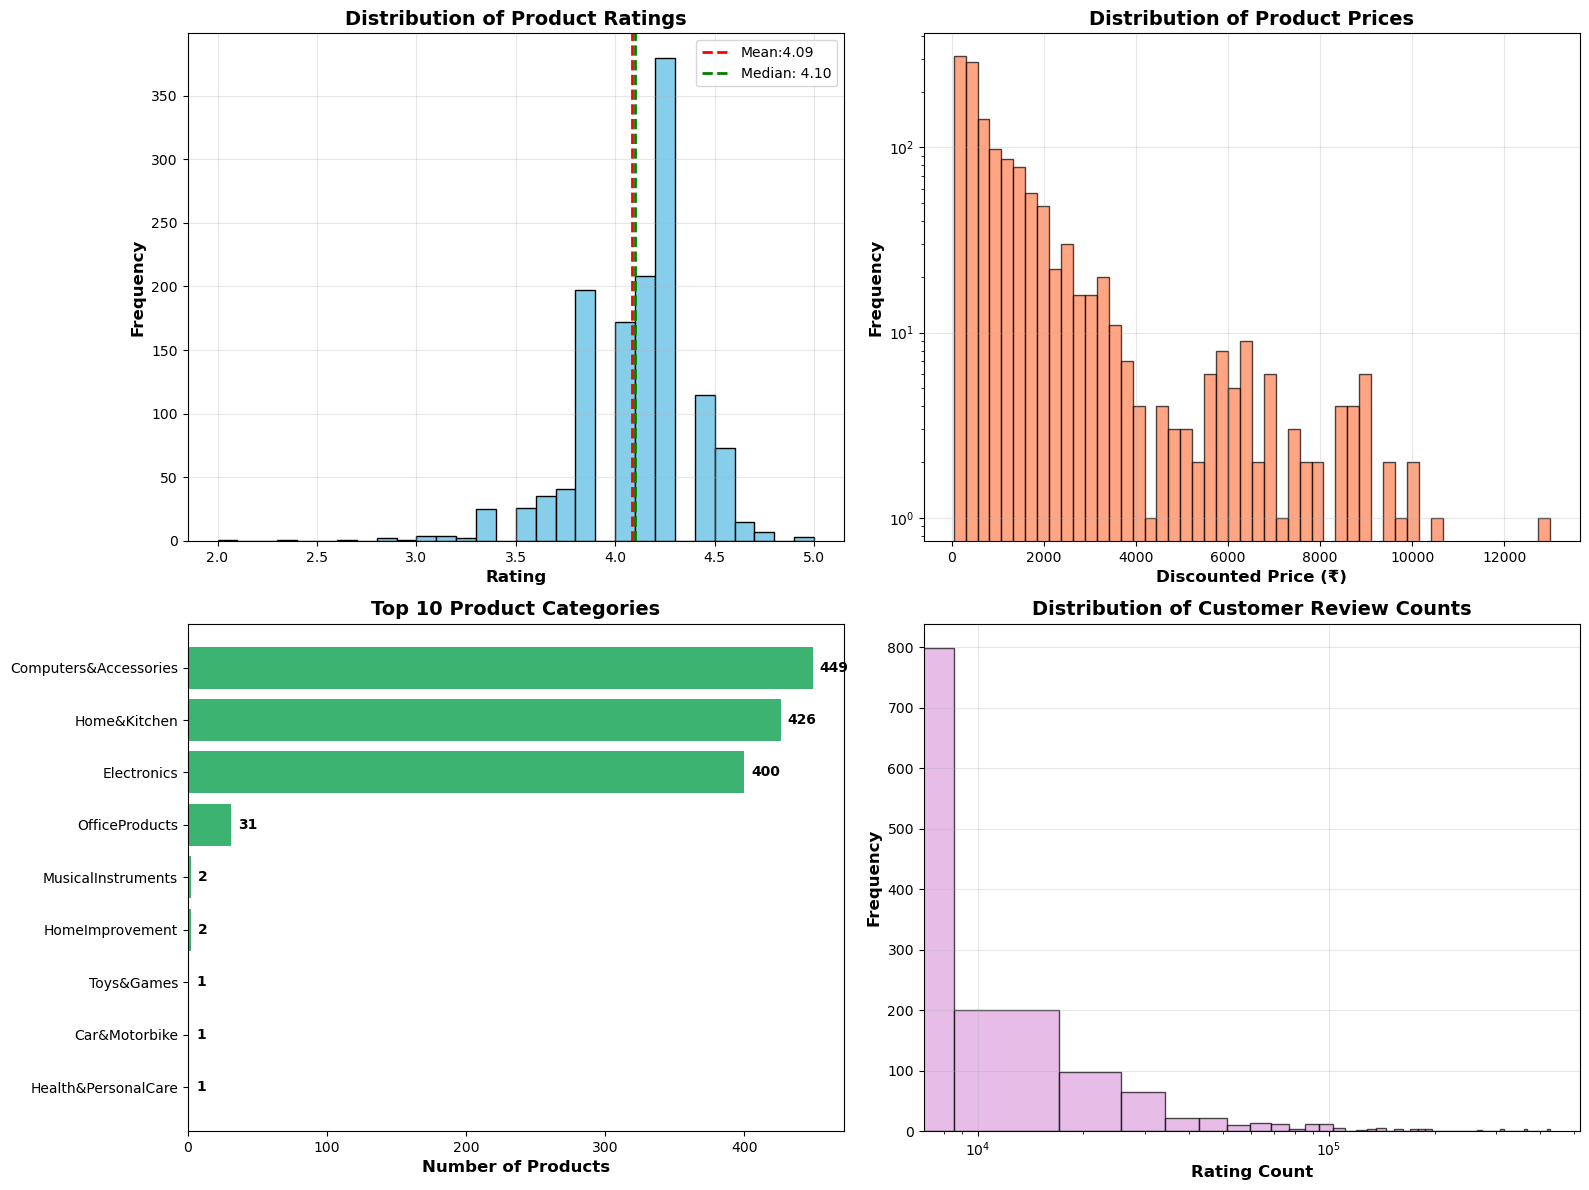

In [114]:
# Figure1: Rating Distribution
fig, axes = plt.subplots(2, 2, figsize=(16,12))

# A. Rating Distribution Histogram
axes[0,0].hist(df_clean['rating'].dropna(), bins=30, color='skyblue', edgecolor='black')
axes[0,0].axvline(df_clean['rating'].mean(), color='red', linestyle='--', linewidth=2,label=f'Mean:{df_clean['rating'].mean():.2f}')
axes[0,0].axvline(df_clean['rating'].median(), color= 'green',linestyle= '--', linewidth=2, label=f'Median: {df_clean["rating"].median():.2f}')
axes[0,0].set_xlabel('Rating', fontsize=12, fontweight='bold')
axes[0,0].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0,0].set_title('Distribution of Product Ratings', fontsize=14, fontweight = 'bold')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# B. Price Distribution (Log Scale)
axes[0, 1].hist(df_clean['discounted_price'], bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Discounted Price (₹)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Distribution of Product Prices', fontsize=14, fontweight='bold')
axes[0, 1].set_yscale('log')
axes[0, 1].grid(True, alpha=0.3)

# C. Top 10 Categories Bar Chart
top_categories = df_clean['main_category'].value_counts().head(10)
axes[1, 0].barh(range(len(top_categories)), top_categories.values, color='mediumseagreen')
axes[1, 0].set_yticks(range(len(top_categories)))
axes[1, 0].set_yticklabels(top_categories.index, fontsize=10)
axes[1, 0].set_xlabel('Number of Products', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Top 10 Product Categories', fontsize=14, fontweight='bold')
axes[1, 0].invert_yaxis()
for i, v in enumerate(top_categories.values):
    axes[1, 0].text(v + 5, i, str(v), va='center', fontweight='bold')
    
# D. Rating Count Distribution (Log Scale)
axes[1, 1].hist(df_clean['rating_count'], bins=50, color='plum', edgecolor='black', alpha=0.7)
axes[1, 1].set_xlabel('Rating Count', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Frequency', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Distribution of Customer Review Counts', fontsize=14, fontweight='bold')
axes[1, 1].set_xscale('log')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('fig1_univariate_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


In [115]:
df_clean.columns

Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link', 'main_category', 'brand',
       'discount_amount', 'Price_range', 'rating_category', 'engagement_level',
       'estimated_sales', 'estimated_revenue', 'profit_margin',
       'engagement_score'],
      dtype='object')

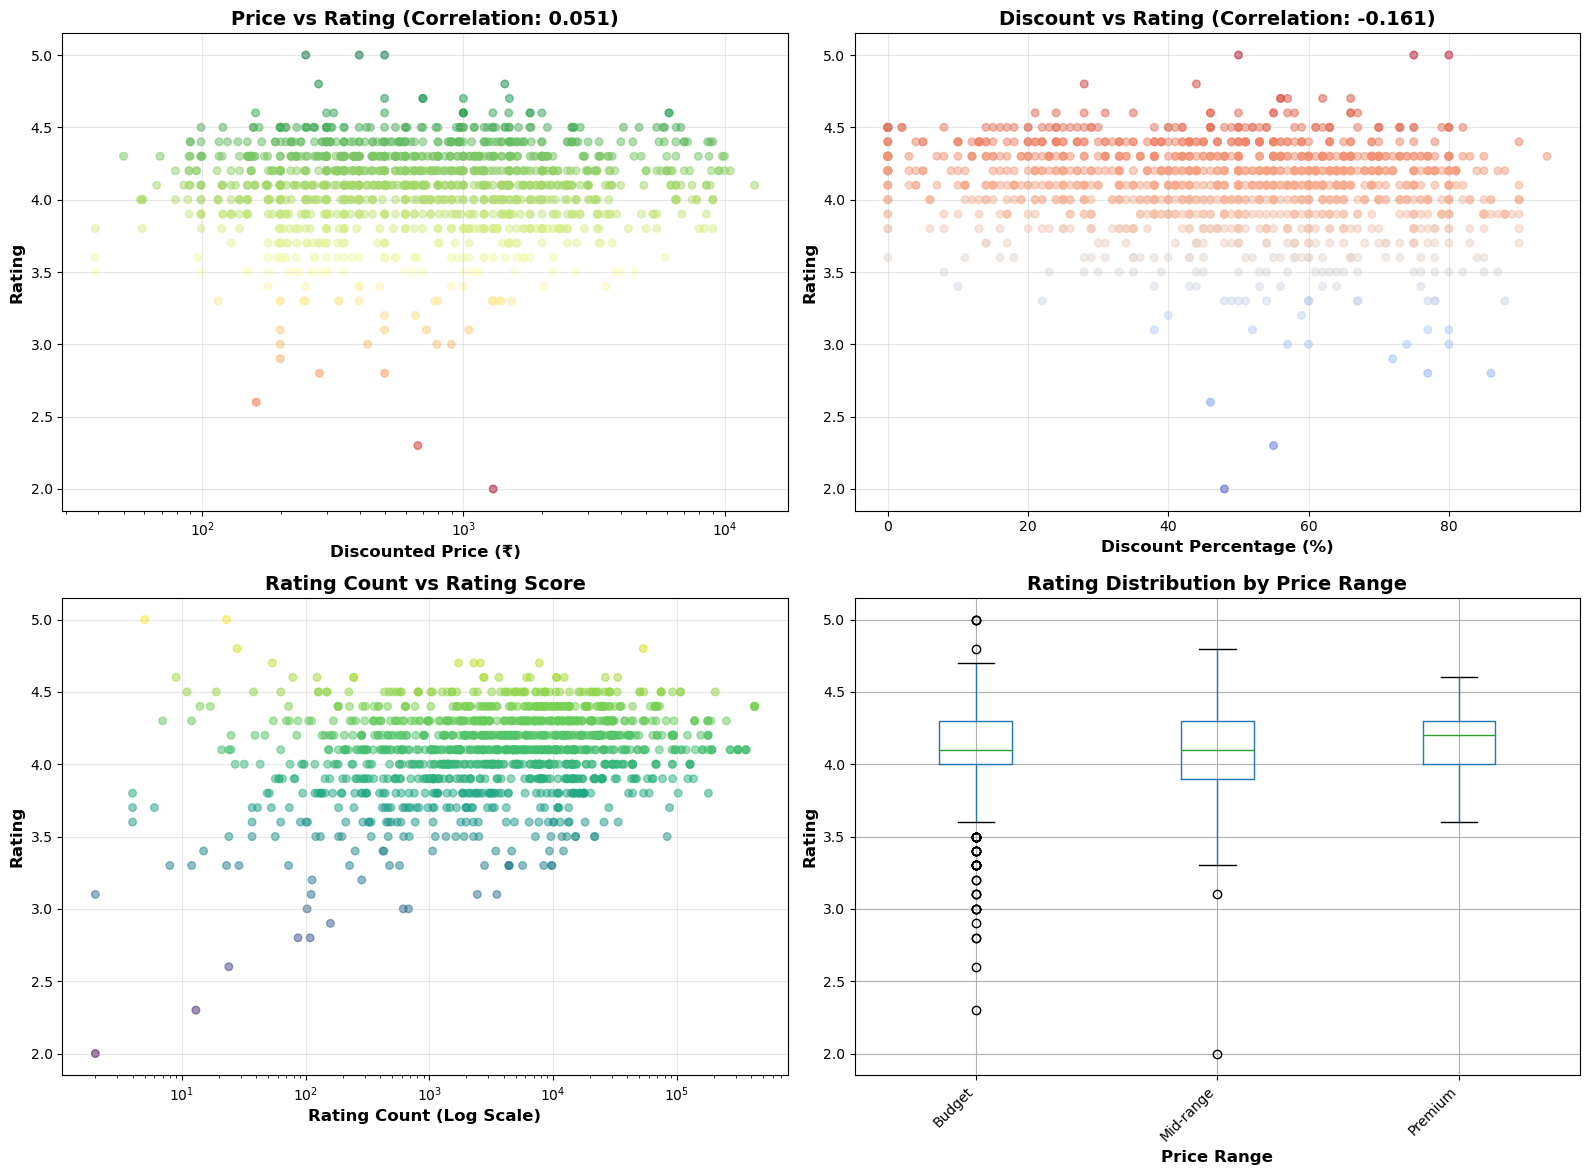

In [116]:
ig, axes = plt.subplots(2, 2, figsize=(16, 12))

# A. Price vs Rating Scatter Plot
axes[0, 0].scatter(df_clean['discounted_price'], df_clean['rating'], 
                   alpha=0.5, c=df_clean['rating'], cmap='RdYlGn', s=30)
axes[0, 0].set_xlabel('Discounted Price (₹)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Rating', fontsize=12, fontweight='bold')
axes[0, 0].set_title(f'Price vs Rating (Correlation: {df_clean["discounted_price"].corr(df_clean["rating"]):.3f})', 
                     fontsize=14, fontweight='bold')
axes[0, 0].set_xscale('log')
axes[0, 0].grid(True, alpha=0.3)

# B. Discount Percentage vs Rating
axes[0, 1].scatter(df_clean['discount_percentage'], df_clean['rating'], 
                   alpha=0.5, c=df_clean['rating'], cmap='coolwarm', s=30)
axes[0, 1].set_xlabel('Discount Percentage (%)', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Rating', fontsize=12, fontweight='bold')
axes[0, 1].set_title(f'Discount vs Rating (Correlation: {df_clean["discount_percentage"].corr(df_clean["rating"]):.3f})', 
                     fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# C. Rating Count vs Rating
axes[1, 0].scatter(df_clean['rating_count'], df_clean['rating'], 
                   alpha=0.5, c=df_clean['rating'], cmap='viridis', s=30)
axes[1, 0].set_xlabel('Rating Count (Log Scale)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Rating', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Rating Count vs Rating Score', fontsize=14, fontweight='bold')
axes[1, 0].set_xscale('log')
axes[1, 0].grid(True, alpha=0.3)

# D. Box Plot: Rating by Price Range
df_clean.boxplot(column='rating', by='Price_range', ax=axes[1, 1])
axes[1, 1].set_xlabel('Price Range', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Rating', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Rating Distribution by Price Range', fontsize=14, fontweight='bold')
axes[1, 1].get_figure().suptitle('')  # Remove automatic title
plt.setp(axes[1, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('fig2_bivariate_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

#### CATEGORY PERFORMANCE VISUALIZATIONS

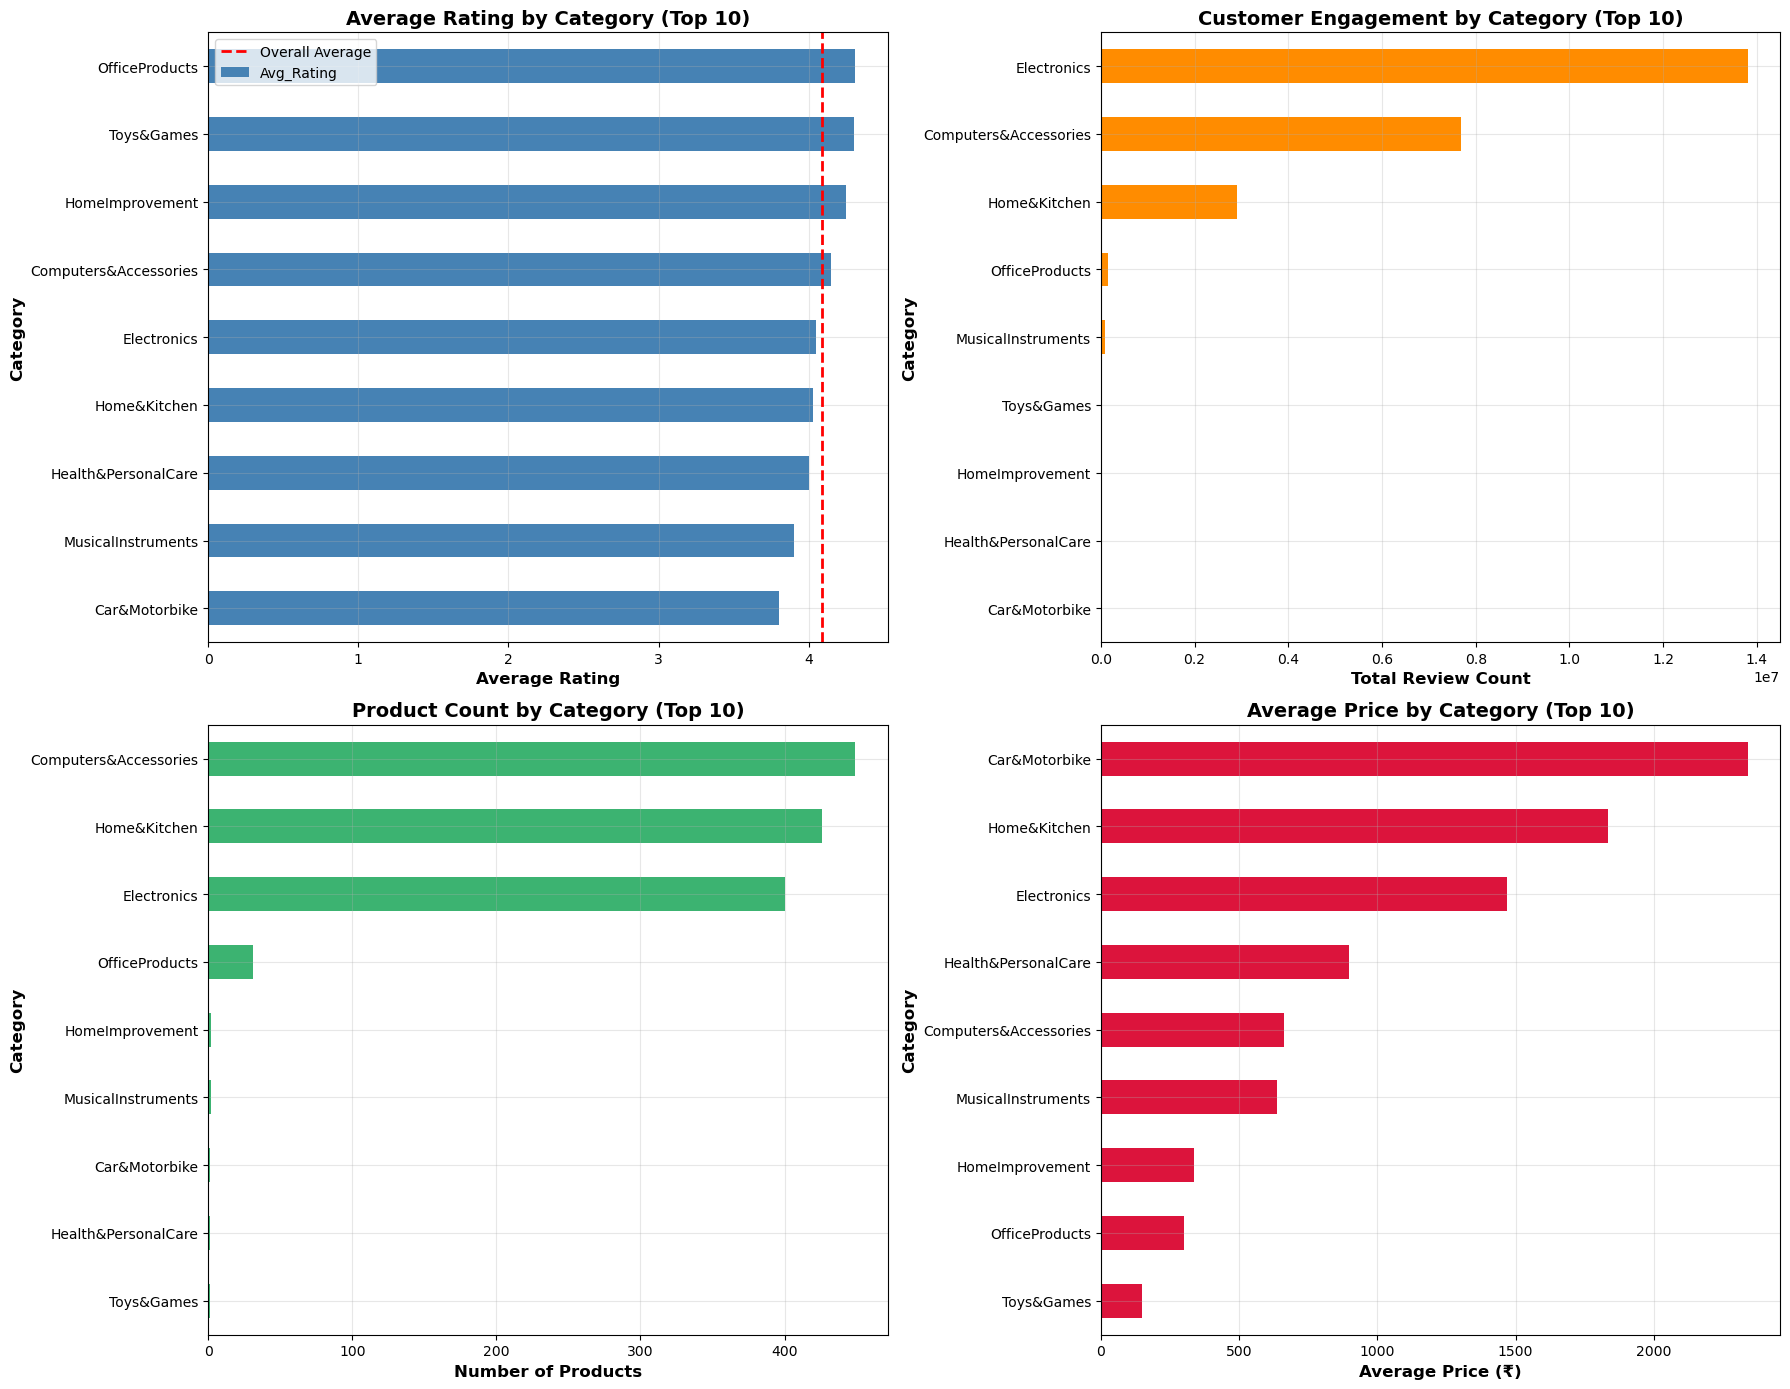

In [117]:
# Calculate category metrics
category_metrics = df_clean.groupby('main_category').agg({
    'rating': 'mean',
    'rating_count': 'sum',
    'discounted_price': 'mean',
    'product_id': 'count'
}).round(2)
category_metrics.columns = ['Avg_Rating', 'Total_Reviews', 'Avg_Price', 'Product_Count']
category_metrics = category_metrics.sort_values('Total_Reviews', ascending=False).head(10)

fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# A. Average Rating by Category
category_metrics.sort_values('Avg_Rating', ascending=True).plot(
    kind='barh', y='Avg_Rating', ax=axes[0, 0], color='steelblue', legend=False
)
axes[0, 0].set_xlabel('Average Rating', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Category', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Average Rating by Category (Top 10)', fontsize=14, fontweight='bold')
axes[0, 0].axvline(df_clean['rating'].mean(), color='red', linestyle='--', linewidth=2, label='Overall Average')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# B. Total Reviews by Category
category_metrics.sort_values('Total_Reviews', ascending=True).plot(
    kind='barh', y='Total_Reviews', ax=axes[0, 1], color='darkorange', legend=False
)
axes[0, 1].set_xlabel('Total Review Count', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Category', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Customer Engagement by Category (Top 10)', fontsize=14, fontweight='bold')
axes[0, 1].grid(True, alpha=0.3)

# C. Product Count by Category
category_metrics.sort_values('Product_Count', ascending=True).plot(
    kind='barh', y='Product_Count', ax=axes[1, 0], color='mediumseagreen', legend=False
)
axes[1, 0].set_xlabel('Number of Products', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Category', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Product Count by Category (Top 10)', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)

# D. Average Price by Category
category_metrics.sort_values('Avg_Price', ascending=True).plot(
    kind='barh', y='Avg_Price', ax=axes[1, 1], color='crimson', legend=False
)
axes[1, 1].set_xlabel('Average Price (₹)', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Category', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Average Price by Category (Top 10)', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('fig3_category_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

#### Correlation Heatmap

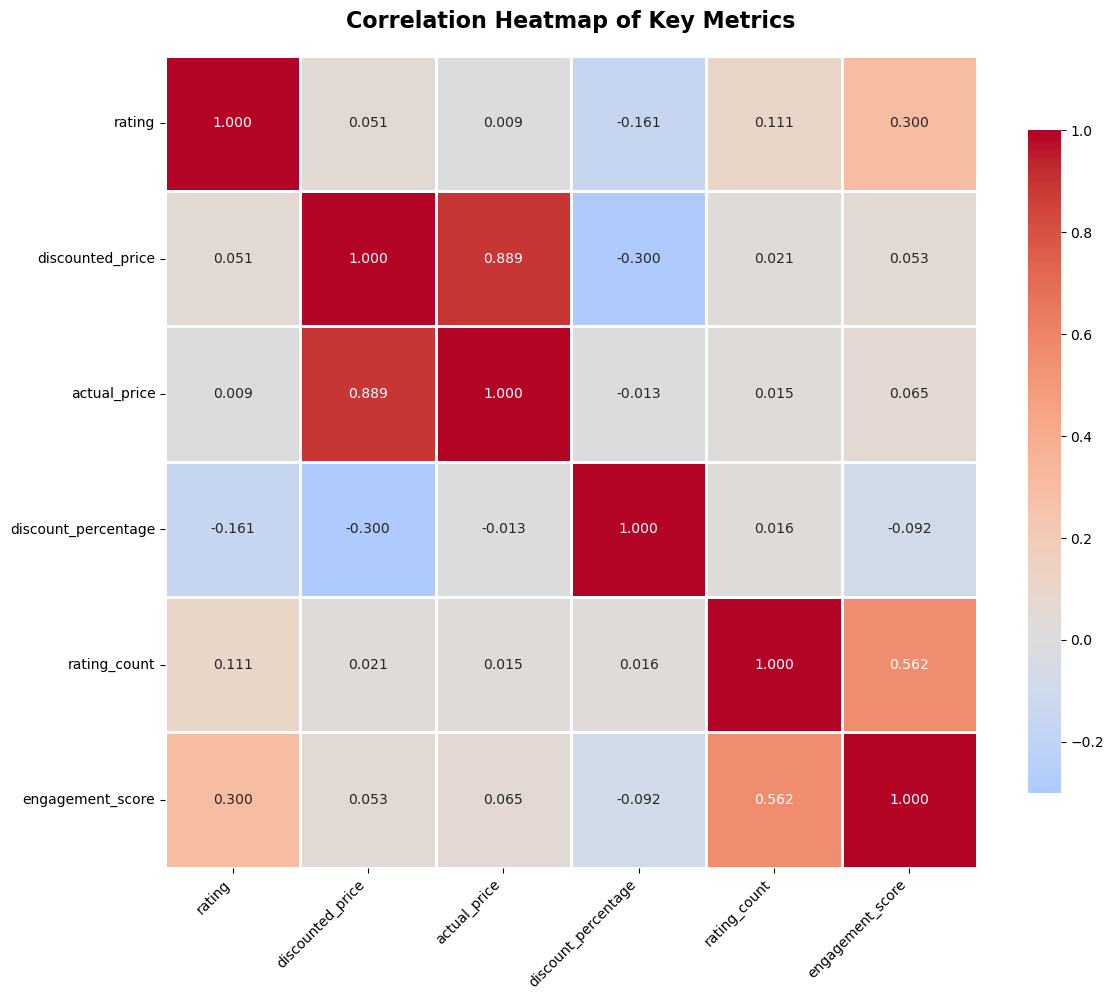

In [118]:
numeric_cols = ['rating', 'discounted_price', 'actual_price', 
                'discount_percentage', 'rating_count', 'engagement_score']
correlation_matrix = df_clean[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of Key Metrics', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('fig4_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

#### Brand Analysis

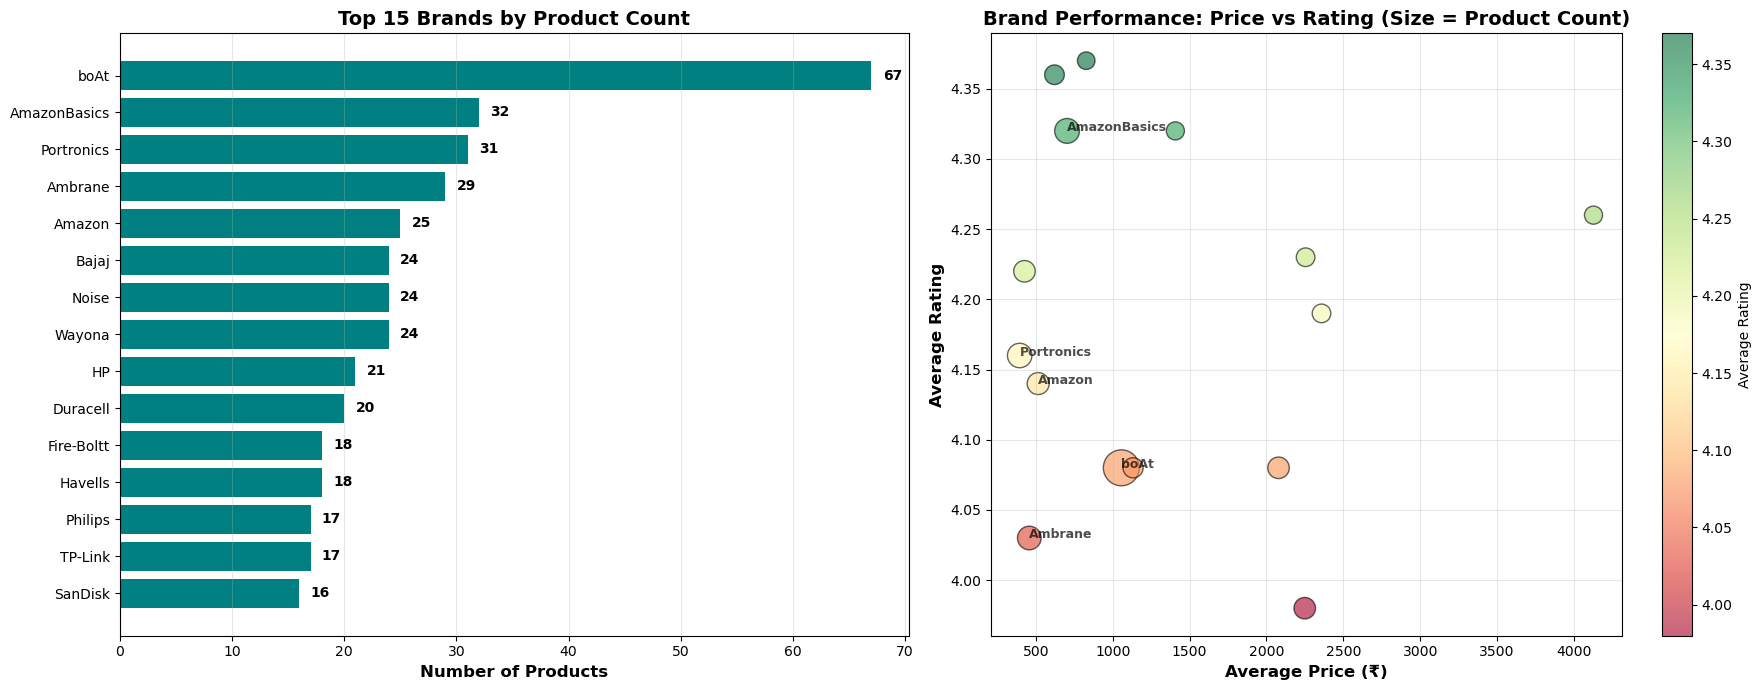

In [119]:
# Top brands by product count and rating
brand_metrics = df_clean.groupby('brand').agg({
    'product_id': 'count',
    'rating': 'mean',
    'discounted_price': 'mean'
}).round(2)
brand_metrics.columns = ['Product_Count', 'Avg_Rating', 'Avg_Price']
brand_metrics = brand_metrics[brand_metrics['Product_Count'] >= 10].sort_values('Product_Count', ascending=False).head(15)

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Top Brands by Products
axes[0].barh(range(len(brand_metrics)), brand_metrics['Product_Count'], color='teal')
axes[0].set_yticks(range(len(brand_metrics)))
axes[0].set_yticklabels(brand_metrics.index, fontsize=10)
axes[0].set_xlabel('Number of Products', fontsize=12, fontweight='bold')
axes[0].set_title('Top 15 Brands by Product Count', fontsize=14, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')
for i, v in enumerate(brand_metrics['Product_Count']):
    axes[0].text(v + 1, i, str(int(v)), va='center', fontweight='bold')

# B. Brand Rating vs Price (Bubble chart)
bubble_sizes = brand_metrics['Product_Count'] * 10
scatter = axes[1].scatter(brand_metrics['Avg_Price'], brand_metrics['Avg_Rating'], 
                          s=bubble_sizes, alpha=0.6, c=brand_metrics['Avg_Rating'], 
                          cmap='RdYlGn', edgecolors='black', linewidth=1)
axes[1].set_xlabel('Average Price (₹)', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Average Rating', fontsize=12, fontweight='bold')
axes[1].set_title('Brand Performance: Price vs Rating (Size = Product Count)', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[1], label='Average Rating')

# Add brand labels for top performers
for idx in brand_metrics.head(5).index:
    axes[1].annotate(idx, (brand_metrics.loc[idx, 'Avg_Price'], brand_metrics.loc[idx, 'Avg_Rating']),
                    fontsize=9, fontweight='bold', alpha=0.7)

plt.tight_layout()
plt.savefig('fig5_brand_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

#### Price Segment Analysis

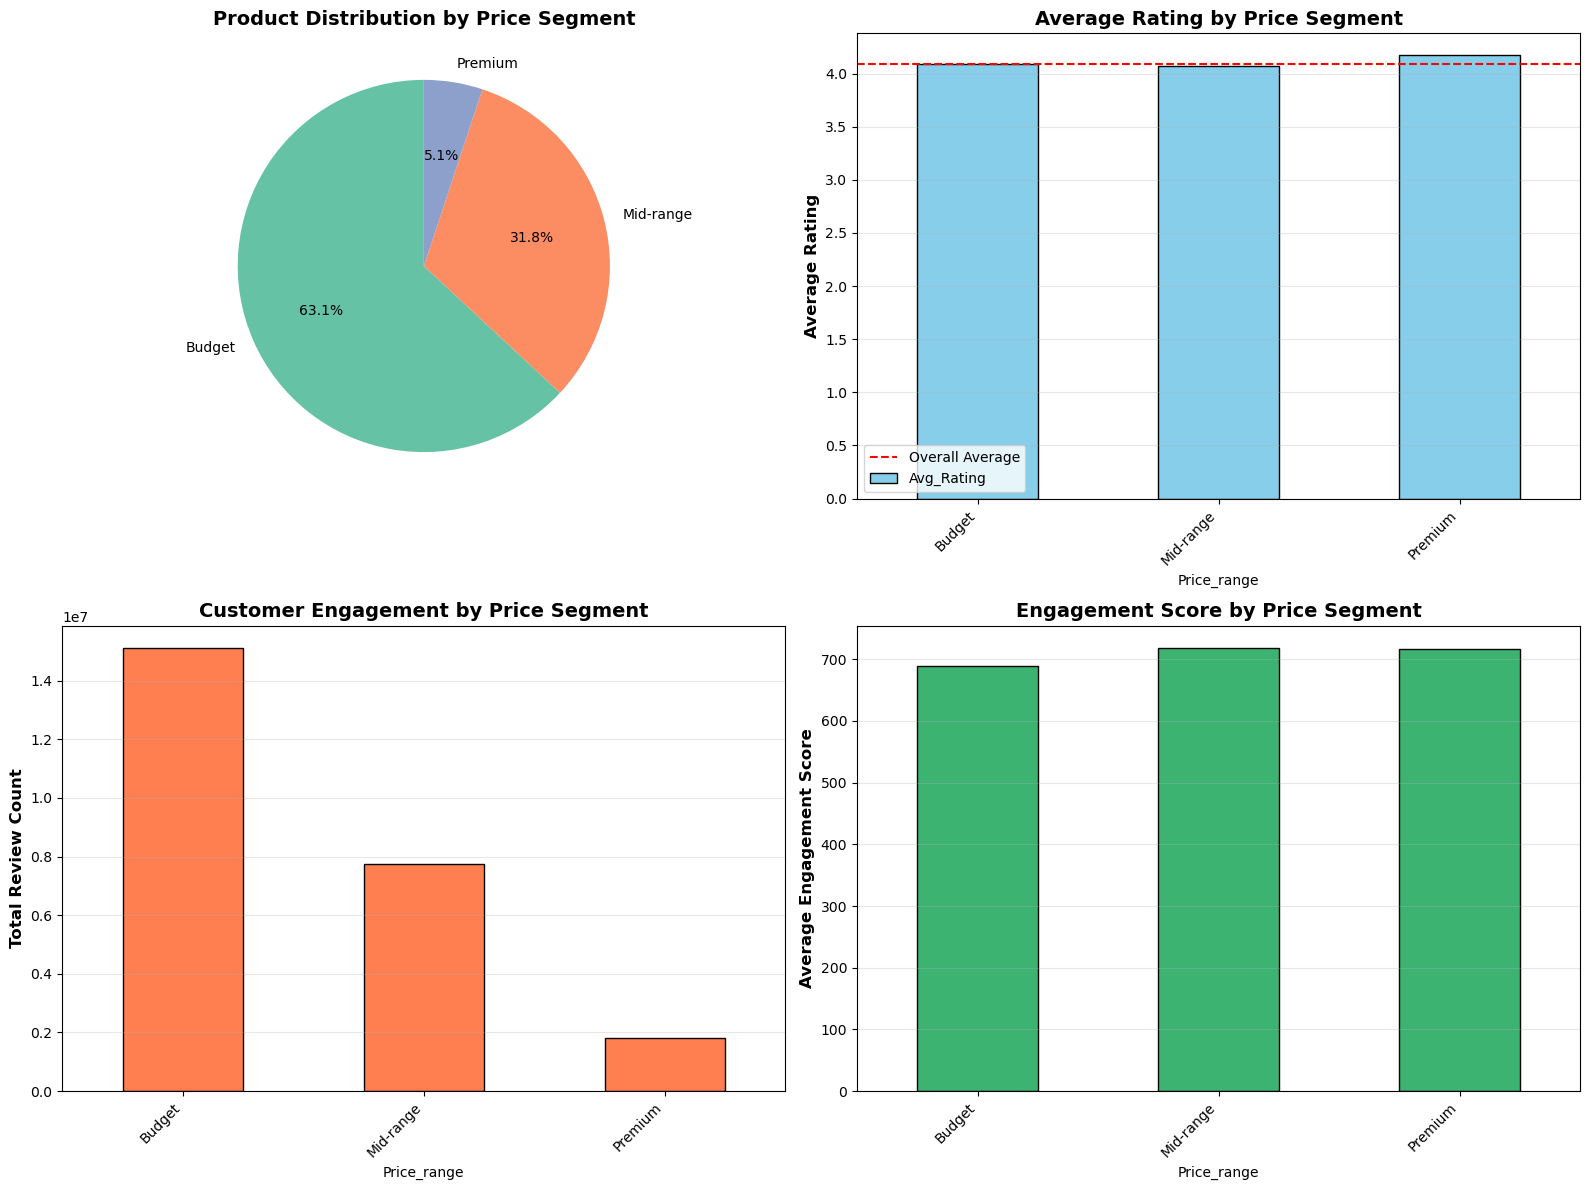

In [120]:
price_segment_stats = df_clean.groupby('Price_range').agg({
    'product_id': 'count',
    'rating': 'mean',
    'rating_count': 'sum',
    'engagement_score': 'mean'
}).round(2)
price_segment_stats.columns = ['Product_Count', 'Avg_Rating', 'Total_Reviews', 'Avg_Engagement']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# A. Product Distribution by Price Segment
axes[0, 0].pie(price_segment_stats['Product_Count'], labels=price_segment_stats.index, 
               autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set2'))
axes[0, 0].set_title('Product Distribution by Price Segment', fontsize=14, fontweight='bold')

# B. Average Rating by Price Segment
price_segment_stats['Avg_Rating'].plot(kind='bar', ax=axes[0, 1], color='skyblue', edgecolor='black')
axes[0, 1].set_ylabel('Average Rating', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Average Rating by Price Segment', fontsize=14, fontweight='bold')
axes[0, 1].set_xticklabels(price_segment_stats.index, rotation=45, ha='right')
axes[0, 1].axhline(df_clean['rating'].mean(), color='red', linestyle='--', label='Overall Average')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')

# C. Total Reviews by Price Segment
price_segment_stats['Total_Reviews'].plot(kind='bar', ax=axes[1, 0], color='coral', edgecolor='black')
axes[1, 0].set_ylabel('Total Review Count', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Customer Engagement by Price Segment', fontsize=14, fontweight='bold')
axes[1, 0].set_xticklabels(price_segment_stats.index, rotation=45, ha='right')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# D. Engagement Score by Price Segment
price_segment_stats['Avg_Engagement'].plot(kind='bar', ax=axes[1, 1], color='mediumseagreen', edgecolor='black')
axes[1, 1].set_ylabel('Average Engagement Score', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Engagement Score by Price Segment', fontsize=14, fontweight='bold')
axes[1, 1].set_xticklabels(price_segment_stats.index, rotation=45, ha='right')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('fig6_price_segment_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

#### Inteeractive Plotly Visualization

In [121]:
# A. Interactive Scatter: Price vs Rating colored by Category
fig = px.scatter(df_clean.sample(500), x='discounted_price', y='rating',
                 color='main_category', size='rating_count',
                 hover_data=['product_name', 'brand'],
                 title='Interactive: Price vs Rating by Category (Sample of 500 products)',
                 labels={'discounted_price': 'Price (₹)', 'rating': 'Rating'})
fig.update_layout(height=600, width=1000)
fig.write_html('interactive_price_rating.html')

# B. Interactive Bar: Top Categories
top_cat_fig = df_clean['main_category'].value_counts().head(15)
fig = px.bar(x=top_cat_fig.index, y=top_cat_fig.values,
             title='Top 15 Product Categories',
             labels={'x': 'Category', 'y': 'Number of Products'},
             color=top_cat_fig.values, color_continuous_scale='Viridis')
fig.update_layout(height=600, width=1000, showlegend=False)
fig.write_html('interactive_top_categories.html')

# C. Interactive Sunburst: Category Hierarchy
fig = px.sunburst(df_clean, path=['main_category', 'brand'], 
                  values='rating_count',
                  title='Product Hierarchy: Categories and Brands')
fig.update_layout(height=700, width=1000)
fig.write_html('interactive_category_hierarchy.html')


##  KEY INSIGHTS & ACTIONABLE RECOMMENDATIONS

In [122]:
# Calculate key metrics for insights
total_products= len(df_clean)
total_revenue = df_clean['estimated_revenue'].sum()
avg_rating = df_clean['rating'].mean()
top_category = category_revenue.index[0]
top_brand = brand_revenue.index[0]

# Calculate revenue concentration
top_3_categories_revenue = category_revenue.head(3)['Total_Revenue'].sum()
top_3_revenue_share = (top_3_categories_revenue / total_revenue) * 100

print(f"• Top 3 categories generate ₹{top_3_categories_revenue:,.0f} ({top_3_revenue_share:.1f}% of total revenue)")
top_categories = list(category_revenue.head(3).index)
print(f"• Revenue leaders: {', '.join(top_categories)}")
print(f"• {top_category} alone accounts for {(category_revenue.iloc[0]['Total_Revenue']/total_revenue*100):.1f}% of revenue")


• Top 3 categories generate ₹3,350,174,308,327 (99.6% of total revenue)
• Revenue leaders: Electronics, Computers&Accessories, Home&Kitchen
• Electronics alone accounts for 67.2% of revenue


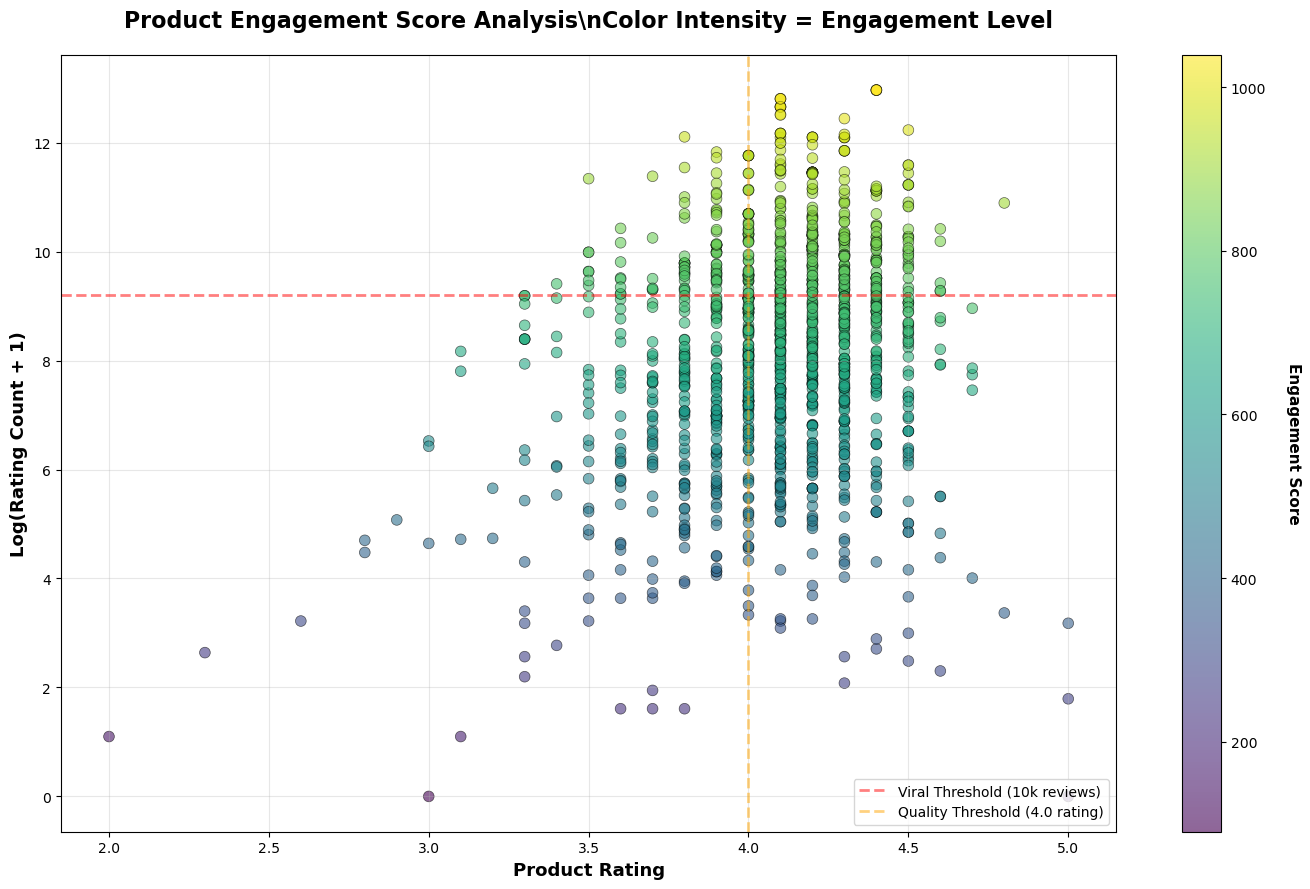

In [123]:
# Engagement Score Visualization
fig = plt.figure(figsize=(14,9))

scatter = plt.scatter(df_clean['rating'],
                     np.log1p(df_clean['rating_count']),
                     c = df_clean['engagement_score'],
                     s=60, alpha=0.6, cmap='viridis', edgecolors='black', linewidth=0.5)

plt.xlabel('Product Rating', fontsize=13, fontweight='bold')
plt.ylabel('Log(Rating Count + 1)', fontsize=13, fontweight='bold')
plt.title('Product Engagement Score Analysis\\nColor Intensity = Engagement Level',
         fontsize=16, fontweight='bold', pad=20)
plt.grid(True,alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Engagement Score', rotation=270, labelpad=25, fontweight='bold', fontsize=11)

# Add reference lines
plt.axhline(y=np.log1p(10000), color='red', linestyle='--',
           alpha=0.5, linewidth=2, label='Viral Threshold (10k reviews)')
plt.axvline(x=4.0, color='orange', linestyle='--',
           alpha=0.5, linewidth=2, label='Quality Threshold (4.0 rating)')
plt.legend(loc='lower right', fontsize=10)
plt.tight_layout()
plt.savefig('2_engagement_analysis.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

#### Price Range Distribution

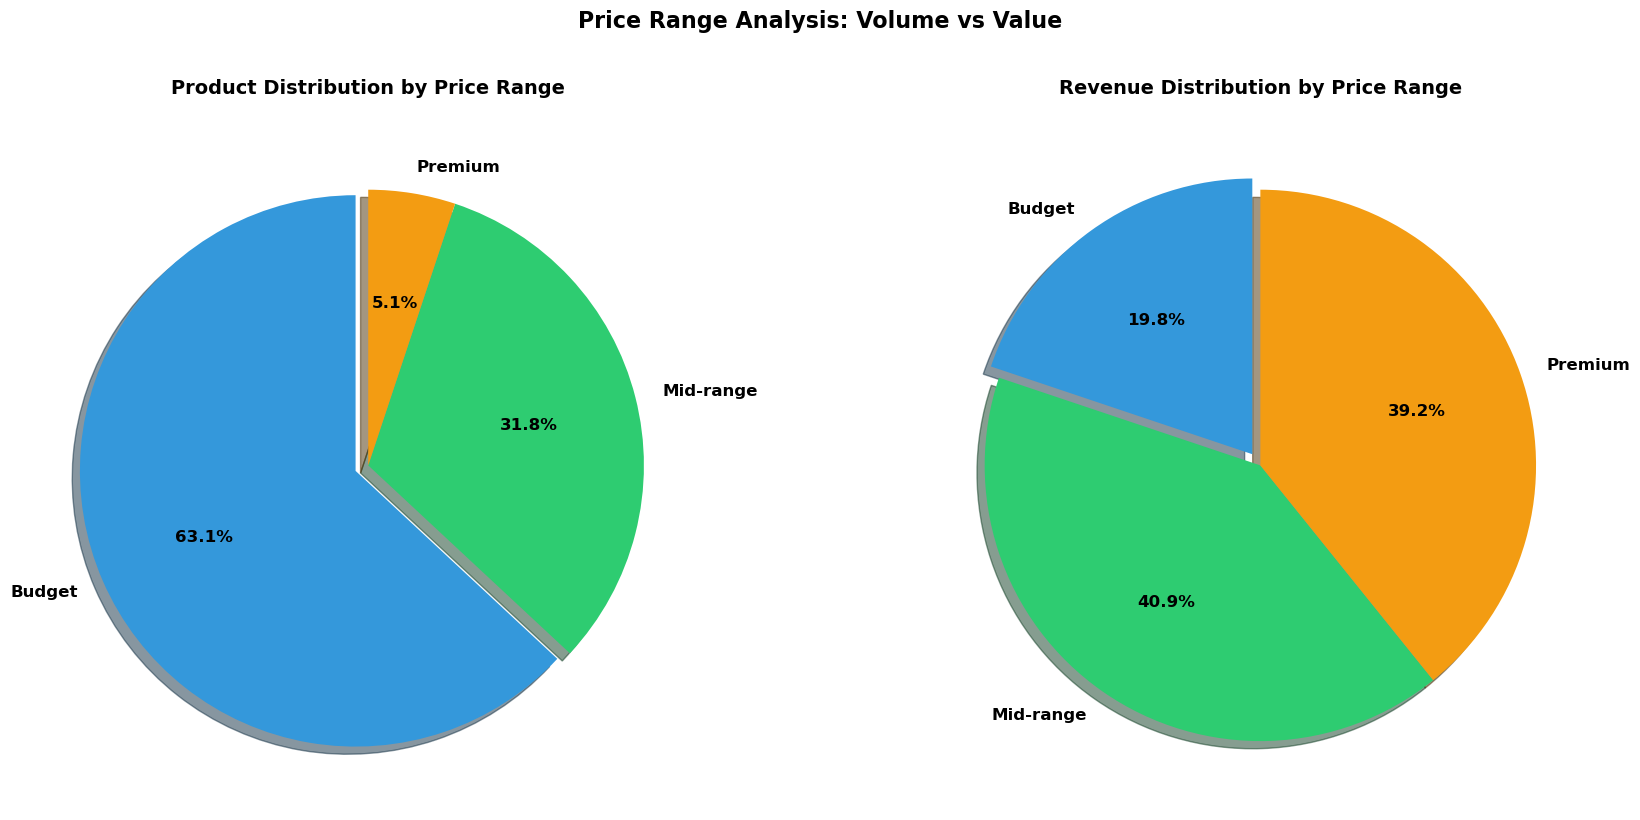

In [124]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Pie chart for product count
price_range_counts = df_clean['Price_range'].value_counts()
colors_pie = ['#3498db', '#2ecc71', '#f39c12', '#e74c3c']
explode = [0.05 if i == 0 else 0 for i in range(len(price_range_counts))]

ax1.pie(price_range_counts.values, labels=price_range_counts.index,
        autopct='%1.1f%%', startangle=90, colors=colors_pie,
        explode=explode, shadow=True, 
        textprops={'fontsize': 12, 'fontweight': 'bold'})
ax1.set_title('Product Distribution by Price Range', 
              fontsize=14, fontweight='bold', pad=20)

# Pie chart for revenue share
price_range_revenue = df_clean.groupby('Price_range')['estimated_revenue'].sum()
ax2.pie(price_range_revenue.values, labels=price_range_revenue.index,
        autopct='%1.1f%%', startangle=90, colors=colors_pie,
        explode=explode, shadow=True, 
        textprops={'fontsize': 12, 'fontweight': 'bold'})
ax2.set_title('Revenue Distribution by Price Range', 
              fontsize=14, fontweight='bold', pad=20)

plt.suptitle('Price Range Analysis: Volume vs Value', 
            fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('7_price_range_distribution.png', dpi=300, bbox_inches='tight')
plt.show()